In [39]:
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import Dataset, DataLoader
from torchsummary import summary
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cpu


In [40]:
data_df = pd.read_csv("riceClassification.csv")
data_df.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [41]:
data_df.dropna(inplace=True)
data_df.drop(['id'], axis=1, inplace=True)
print(data_df.shape)

(18185, 11)


In [42]:
data_df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [43]:
print(data_df["Class"].unique())

[1 0]


In [44]:
print(data_df["Class"].value_counts())

Class
1    9985
0    8200
Name: count, dtype: int64


In [45]:
original_df = data_df.copy()
for column in data_df.columns:
    data_df[column] = data_df[column]/data_df[column].abs().max()

data_df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,0.444368,0.503404,0.775435,0.744658,0.424873,0.666610,0.741661,0.537029,0.844997,0.368316,1.0
1,0.281293,0.407681,0.622653,0.750489,0.273892,0.530370,0.804230,0.409661,0.919215,0.371471,1.0
2,0.298531,0.416421,0.630442,0.756341,0.284520,0.546380,0.856278,0.412994,0.959862,0.374747,1.0
3,0.300979,0.420463,0.629049,0.764024,0.286791,0.548616,0.883772,0.414262,0.961818,0.379222,1.0
4,0.361704,0.464626,0.682901,0.775033,0.345385,0.601418,0.867808,0.452954,0.966836,0.386007,1.0


In [46]:
X = data_df.iloc[:, :-1].values
y = data_df.iloc[:, -1].values

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [48]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

In [49]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(12729, 10)
(2728, 10)
(2728, 10)


In [50]:
class dataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32).to(device=device)
        self.y = torch.tensor(y, dtype=torch.float32).to(device=device)
    def __len__(self):
        return len(self.X)
    def __getitem__(self, index):
        return self.X[index], self.y[index]

In [51]:
training_data = dataset(X_train, y_train)
validation_data = dataset(X_val, y_val)
testing_data = dataset(X_test, y_test)

In [52]:
train_dataloader = DataLoader(training_data, batch_size=8, shuffle=True)
validation_dataloader = DataLoader(validation_data, batch_size=8, shuffle=True)
testing_dataloader = DataLoader(testing_data, batch_size=8, shuffle=True)

In [53]:
HIDDEN_NEURONS = 10
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()

        self.input_layer = nn.Linear(X.shape[1], HIDDEN_NEURONS)
        self.linear = nn.Linear(HIDDEN_NEURONS, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, X):
        X = self.input_layer(X)
        X = self.linear(X)
        X = self.sigmoid(X)
        return X
    
model = MyModel().to(device)

In [54]:
summary(model, (X.shape[1], ))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 10]             110
            Linear-2                    [-1, 1]              11
           Sigmoid-3                    [-1, 1]               0
Total params: 121
Trainable params: 121
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [55]:
criterion = nn.BCELoss()
optimizer = Adam(model.parameters(), lr = 1e-3)

In [56]:
total_loss_train_plot = []
total_loss_val_plot = []
total_acc_train_plot = []
total_acc_val_plot = []

epochs = 10
for epoch in range(epochs):
    total_acc_train = 0
    total_loss_train = 0
    total_acc_val = 0
    total_loss_val = 0

    for data in train_dataloader:
        inputs, labels = data

        prediction = model(inputs).squeeze(1)
        batch_loss = criterion(prediction, labels)
        
        total_loss_train += batch_loss.item()
        acc = ((prediction).round() == labels).sum().item()
        total_acc_train += acc

        batch_loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    with torch.no_grad():
        for data in validation_dataloader:
            inputs, labels = data

            prediction = model(inputs).squeeze(1)
            batch_loss = criterion(prediction, labels)

            total_loss_val += batch_loss.item()
            acc = ((prediction).round() == labels).sum().item()
            total_acc_val += acc
    total_loss_train_plot.append(round(total_loss_train/1000, 4))
    total_loss_val_plot.append(round(total_loss_val/1000, 4))

    total_acc_train_plot.append(round(total_acc_train/training_data.__len__() * 100, 4))
    total_acc_val_plot.append(round(total_acc_val/validation_data.__len__() * 100, 4))

    print(f'''Epoch no.: {epoch+1} Train loss: {round(total_loss_train/1000, 4)} Train Accuracy: {round(total_acc_train/training_data.__len__() * 100, 4)}
            Validation loss: {round(total_loss_val/1000, 4)} Validation Accuracy: {round(total_acc_val/validation_data.__len__() * 100, 4)}''')
    print("="*25)

Epoch no.: 1 Train loss: 0.5568 Train Accuracy: 95.8756
            Validation loss: 0.0383 Validation Accuracy: 98.6804
Epoch no.: 2 Train loss: 0.1312 Train Accuracy: 98.3659
            Validation loss: 0.0177 Validation Accuracy: 98.5704
Epoch no.: 3 Train loss: 0.0886 Train Accuracy: 98.4838
            Validation loss: 0.0138 Validation Accuracy: 98.6437
Epoch no.: 4 Train loss: 0.0788 Train Accuracy: 98.3895
            Validation loss: 0.0129 Validation Accuracy: 98.827
Epoch no.: 5 Train loss: 0.0752 Train Accuracy: 98.5231
            Validation loss: 0.0118 Validation Accuracy: 98.7537
Epoch no.: 6 Train loss: 0.0741 Train Accuracy: 98.4759
            Validation loss: 0.0122 Validation Accuracy: 98.9003
Epoch no.: 7 Train loss: 0.0735 Train Accuracy: 98.4209
            Validation loss: 0.0115 Validation Accuracy: 98.937
Epoch no.: 8 Train loss: 0.0717 Train Accuracy: 98.4916
            Validation loss: 0.0112 Validation Accuracy: 98.9003
Epoch no.: 9 Train loss: 0.072 Tra

In [57]:
with torch.no_grad():
    total_loss_test = 0
    total_acc_test = 0
    for data in testing_dataloader:
        inputs, labels = data
        prediction = model(inputs).squeeze(1)
        batch_loss_test = criterion(prediction, labels).item()
        total_loss_test += batch_loss_test
        acc = ((prediction).round() == labels).sum().item()
        total_acc_test += acc
print("Accuracy: ", round(total_acc_test/testing_data.__len__() * 100, 4))

Accuracy:  98.9003


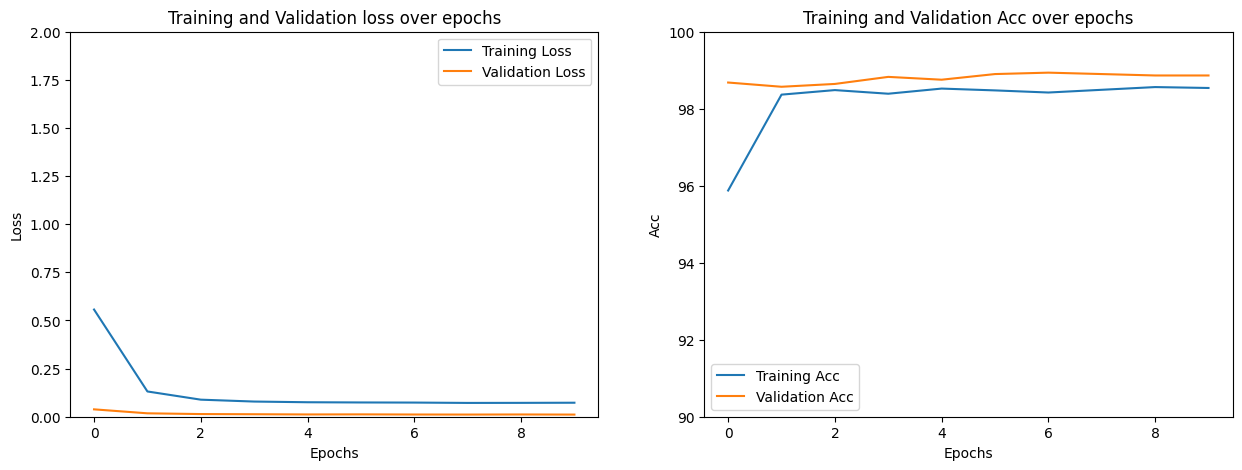

In [58]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))

axs[0].plot(total_loss_train_plot, label='Training Loss')
axs[0].plot(total_loss_val_plot, label='Validation Loss')
axs[0].set_title("Training and Validation loss over epochs")
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].set_ylim([0, 2])
axs[0].legend()

axs[1].plot(total_acc_train_plot, label='Training Acc')
axs[1].plot(total_acc_val_plot, label='Validation Acc')
axs[1].set_title("Training and Validation Acc over epochs")
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Acc')
axs[1].set_ylim([90, 100])
axs[1].legend()